In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
train_data = pd.read_csv(r'C:\Users\hp\Downloads\archivek\Base.csv')

In [29]:
train_data = pd.read_csv(r'C:\Users\hp\Downloads\archivek\Base.csv')
test_data = pd.read_csv(r'C:\Users\hp\Downloads\archivek\Variant I.csv')

print("Training Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())


Training Data:
   fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           0     0.3               0.986506                         -1   
1           0     0.8               0.617426                         -1   
2           0     0.8               0.996707                          9   
3           0     0.6               0.475100                         11   
4           0     0.9               0.842307                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            25            40            0.006735   
1                            89            20            0.010095   
2                            14            40            0.012316   
3                            14            30            0.006991   
4                            29            40            5.742626   

   intended_balcon_amount payment_type  zip_count_4w  ...  has_other_cards  \
0              102.453711           AA   

In [15]:
label_encoders = {}
for column in train_data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    train_data[column] = label_encoders[column].fit_transform(train_data[column])
    test_data[column] = label_encoders[column].transform(test_data[column])

In [30]:
train_data

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.8,0.124690,-1,143,30,0.051348,-0.826239,AB,530,...,0,1500.0,0,INTERNET,16.967770,other,0,1,0,7
999996,0,0.9,0.824544,-1,193,30,0.009591,0.008307,AC,408,...,1,1000.0,0,INTERNET,1.504109,macintosh,0,1,0,7
999997,0,0.8,0.140891,-1,202,10,0.059287,50.609995,AA,749,...,0,200.0,0,INTERNET,16.068595,other,0,1,0,7
999998,0,0.9,0.002480,52,3,30,0.023357,-1.313387,AB,707,...,0,200.0,0,INTERNET,1.378683,linux,1,1,0,7


Data type of target variable (customer_age): int64
Unique values in the target variable (customer_age): [40 20 30 50 60 90 80 70 10]


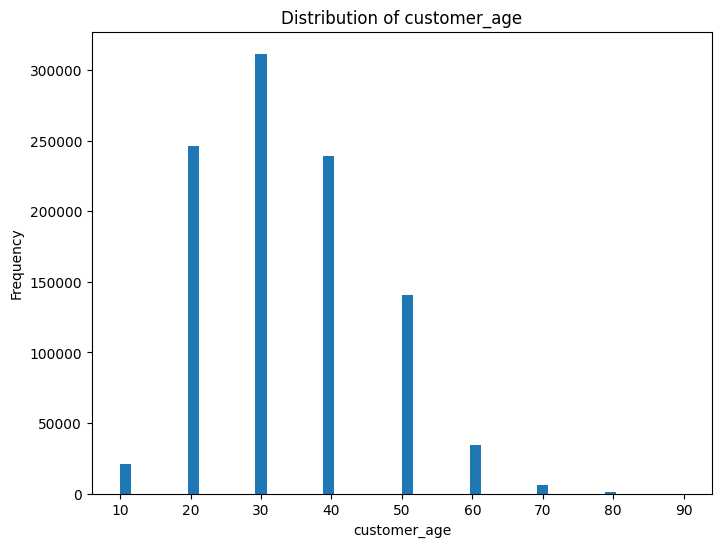

In [24]:
target_variable = 'customer_age'  

print(f"Data type of target variable ({target_variable}): {train_data[target_variable].dtype}")

unique_values = train_data[target_variable].unique()
print(f"Unique values in the target variable ({target_variable}): {unique_values}")

plt.figure(figsize=(8, 6))
if train_data[target_variable].dtype in ['int64', 'float64']:
    train_data[target_variable].plot(kind='hist', bins=50, title=f'Distribution of {target_variable}')
else:
    train_data[target_variable].value_counts().plot(kind='bar', title=f'Distribution of {target_variable}')
plt.xlabel(target_variable)
plt.ylabel('Frequency')
plt.show()


In [26]:
X = train_data.drop(columns=[target_variable])
y = train_data[target_variable]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_val)

print("RMSE:", mean_squared_error(y_val, y_pred_linear, squared=False))
print("R2 Score:", r2_score(y_val, y_pred_linear))


Linear Regression RMSE: 9.926314864071484
Linear Regression R2 Score: 0.31979410022587007


c:\Users\hp\Desktop\Documents\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [31]:
intercept = linear_model.intercept_
coefficient = linear_model.coef_

print(intercept)
print(coefficient)

38.136845978224905
[ 2.55404558e+00  2.92130290e+00 -1.36979142e+00 -6.92001390e-03
  5.86998273e-03 -1.34710959e-02 -1.52738477e-02 -2.02162050e-01
  1.97652171e-04  9.14954046e-06  1.35883868e-04  6.95659676e-04
  5.27880723e-04 -8.42623498e-01  5.17784944e-01  8.53028691e-03
  4.80745786e-01 -2.46913027e+00  2.64283075e+00 -1.96810951e+00
  1.25017359e-02  1.43690990e+00  8.79958252e-04  2.37704237e-01
  1.80253908e+00  3.00831532e-02 -1.30618183e-02  2.57050850e-01
  1.04807662e+00  0.00000000e+00 -2.87295118e-01]
